## Analyzing COVID-19 cases in NYC

In [1]:
!pip install geopandas
!pip install descartes
!pip install matplotlib
!pip install numpy
!pip install pandas

     |████████████████████████████████| 931kB 3.0MB/s eta 0:00:01
     |████████████████████████████████| 1.8MB 7.3MB/s eta 0:00:01
     |████████████████████████████████| 14.7MB 59kB/s  eta 0:00:01     |████████████▍                   | 5.7MB 3.4MB/s eta 0:00:03 0:00:01     |███████████████████████         | 10.6MB 6.1MB/s eta 0:00:01     |███████████████████████▊        | 10.9MB 6.1MB/s eta 0:00:01     |████████████████████████▌       | 11.2MB 6.1MB/s eta 0:00:01��██▍   | 13.1MB 6.1MB/s eta 0:00:01
     |████████████████████████████████| 10.9MB 59kB/s  eta 0:00:01�████████████████▍           | 7.0MB 7.7MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' comma

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
%matplotlib inline

In [3]:
#import geopandas as gpd

## 1 Load Data

In [4]:
#Load Test table
df_test = pd.read_csv ('tests-by-zcta.txt', delimiter =',')
df_test.head()

,MODZCTA,Positive,Total,zcta_cum.perc_pos
0,NaN,1443,1710,84.39
1,10001.0,300,759,39.53
2,10002.0,828,1746,47.42
3,10003.0,381,1037,36.74
4,10004.0,26,79,32.91


In [5]:
print('Data shape: ', df_test.shape)

Data shape:  (178, 4)


In [6]:
df_test.info()
df_test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 4 columns):
MODZCTA              177 non-null float64
Positive             178 non-null int64
Total                178 non-null int64
zcta_cum.perc_pos    178 non-null float64
dtypes: float64(2), int64(2)
memory usage: 5.6 KB


,MODZCTA,Positive,Total,zcta_cum.perc_pos
count,177.000000,178.000000,178.000000,178.000000
mean,10810.378531,892.129213,1812.443820,46.923539
std,578.173317,622.640160,1142.991753,8.375670
min,10001.000000,21.000000,78.000000,25.280000
25%,10301.000000,425.750000,904.000000,41.685000
50%,11109.000000,742.000000,1535.500000,47.925000
75%,11361.000000,1301.250000,2595.000000,52.272500
max,11697.000000,3417.000000,5491.000000,84.390000


In [7]:
df_test = df_test.drop([0])
df_test = df_test.rename(columns={'MODZCTA': 'Zip_Code', 'zcta_cum.perc_pos': 'Positive_Rate'})
print(df_test.head(10))

    Zip_Code  Positive  Total  Positive_Rate
1    10001.0       300    759          39.53
2    10002.0       828   1746          47.42
3    10003.0       381   1037          36.74
4    10004.0        26     79          32.91
5    10005.0        51    171          29.82
6    10006.0        21     78          26.92
7    10007.0        45    178          25.28
8    10009.0       587   1526          38.47
9    10010.0       225    763          29.49
10   10011.0       450   1109          40.58


In [8]:
#Load Income table
df_income = pd.read_csv ('Income 2018.csv')
df_income.head()

,geoid,Zip_Code,Median_Income
0,86000US07421,7421,92274
1,86000US10001,10001,88526
2,86000US10002,10002,35859
3,86000US10003,10003,112131
4,86000US10004,10004,157645


In [9]:
print('Data shape: ', df_income.shape)

Data shape:  (1646, 3)


In [10]:
df_income.info()
df_income.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 3 columns):
geoid            1646 non-null object
Zip_Code         1646 non-null int64
Median_Income    1646 non-null int64
dtypes: int64(2), object(1)
memory usage: 38.7+ KB


,Zip_Code,Median_Income
count,1646.000000,1646.000000
mean,12746.985419,70733.653098
std,1325.165010,31242.076564
min,7421.000000,15089.000000
25%,11771.250000,51173.750000
50%,12837.500000,61690.500000
75%,13783.750000,82067.250000
max,14905.000000,250001.000000


In [14]:
#Load Population table 
df = pd.read_excel ('population_zip_code.xlsx')
df.tail(10)

,Rank,Zip Code,Population
1595,"1,596 TIE",12811 and 12490,28
1596,1597,13860,26
1597,1598,12911,25
1598,1599,12864,24
1599,1600,14112,18
1600,1601,13475,16
1601,1602,13826,15
1602,"1,603 TIE",14854 and 13623,13
1603,1604,13353,10
1604,1605,12862,5


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 3 columns):
Rank          1605 non-null object
Zip Code      1605 non-null object
Population    1605 non-null int64
dtypes: int64(1), object(2)
memory usage: 37.7+ KB


In [16]:
# Create dataframe with "Rank" has no tie
df_tie = df[~df.Rank.str.contains("TIE", na=False)]
df_tie.sample(5)

,Rank,Zip Code,Population
533,534,12209,9383
767,768,13838,4284
191,192,10956,31619
511,512,11518,10101
476,477,10601,11612


In [17]:
df_tie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 0 to 1604
Data columns (total 3 columns):
Rank          1472 non-null object
Zip Code      1472 non-null object
Population    1472 non-null int64
dtypes: int64(1), object(2)
memory usage: 46.0+ KB


In [18]:
#Replace "and" in Zip Code in Population table
df["Zip Code"]= df["Zip Code"].replace("and", ",", regex=True)

In [19]:
#Split columns with "," into multiple rows
df_split = df.set_index(['Rank']).stack().str.split('/|, ,|,', expand=True).stack().unstack(-2).reset_index(-1, drop=True).reset_index()
df_split.tail(10)

,Rank,Zip Code
271,"1,591 TIE",12436
272,"1,591 TIE",12922
273,"1,595 TIE",12438
274,"1,595 TIE",13352
275,"1,595 TIE",14168
276,"1,595 TIE",13102
277,"1,596 TIE",12811
278,"1,596 TIE",12490
279,"1,603 TIE",14854
280,"1,603 TIE",13623


In [20]:
df_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 2 columns):
Rank        281 non-null object
Zip Code    281 non-null object
dtypes: object(2)
memory usage: 4.5+ KB


In [21]:
#Merge split dataframe with population table to get population variables
df_split_population = pd.merge(df, df_split, on="Rank", how = "left")
df_split_population = df_split_population.dropna()
df_split_population.tail(10)

,Rank,Zip Code_x,Population,Zip Code_y
1732,"1,591 TIE","12436 , 12922",39,12436
1733,"1,591 TIE","12436 , 12922",39,12922
1737,"1,595 TIE","12438, 13352, 14168, , 13102",32,12438
1738,"1,595 TIE","12438, 13352, 14168, , 13102",32,13352
1739,"1,595 TIE","12438, 13352, 14168, , 13102",32,14168
1740,"1,595 TIE","12438, 13352, 14168, , 13102",32,13102
1741,"1,596 TIE","12811 , 12490",28,12811
1742,"1,596 TIE","12811 , 12490",28,12490
1749,"1,603 TIE","14854 , 13623",13,14854
1750,"1,603 TIE","14854 , 13623",13,13623


In [22]:
df_split_population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 297 to 1750
Data columns (total 4 columns):
Rank          281 non-null object
Zip Code_x    281 non-null object
Population    281 non-null int64
Zip Code_y    281 non-null object
dtypes: int64(1), object(3)
memory usage: 11.0+ KB


In [23]:
df_split_population = df_split_population.drop(['Zip Code_x'], axis=1)

In [24]:
df_split_population.sample(10)

,Rank,Population,Zip Code_y
1070,"1,041 TIE",1972,12577
1322,"1,266 TIE",897,14729
844,833 TIE,3424,14719
701,698 TIE,5404,12025
1505,"1,417 TIE",395,12108
1576,"1,473 TIE",271,12786
1251,"1,206 TIE",1148,14753
1439,"1,361 TIE",562,12412
1633,"1,514 TIE",185,13115
1415,"1,341 TIE",612,14808


In [25]:
count = df["Population"].isna().sum()
count

0

In [26]:
df_split_population = df_split_population.rename(columns={'Zip Code_y': 'Zip Code'})

In [27]:
#Combine Tie dataframe and new split dataframe
df_population = pd.concat([df_tie,df_split_population], sort= False)
df_population.sample(5)

,Rank,Zip Code,Population
1242,1243,12046,1025
1059,1060,14814,1833
132,133,10705,40733
1180,1181,10964,1283
65,66,11435,59296


In [28]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1753 entries, 0 to 1750
Data columns (total 3 columns):
Rank          1753 non-null object
Zip Code      1753 non-null object
Population    1753 non-null int64
dtypes: int64(1), object(2)
memory usage: 54.8+ KB


In [55]:
df_population.describe()

,Zip_Code,Population
count,1753.000000,1753.000000
mean,12757.875071,11175.559612
std,1313.973031,17907.810072
min,6390.000000,5.000000
25%,11792.000000,925.000000
50%,12841.000000,3189.000000
75%,13780.000000,12985.000000
max,14905.000000,112425.000000


In [30]:
df_population = df_population.rename(columns={'Zip Code': 'Zip_Code'})
df_population.head()

,Rank,Zip_Code,Population
0,1,11368,112425
1,2,11385,106717
2,3,10467,103732
3,4,11211,102624
4,5,11236,100331


In [31]:
df_population = df_population.drop(['Rank'], axis=1)

In [33]:
df_population.tail(20)

,Zip_Code,Population
1702,12722,92
1712,13794,70
1713,14756,70
1715,13087,66
1716,13415,66
1717,13472,66
1724,12872,47
1725,13696,47
1728,10279,43
1729,11973,43


In [34]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1753 entries, 0 to 1750
Data columns (total 2 columns):
Zip_Code      1753 non-null object
Population    1753 non-null int64
dtypes: int64(1), object(1)
memory usage: 41.1+ KB


In [35]:
to_excel = df_population.to_excel('population.xlsx')

In [36]:
#Convert Zip_Code type from object to integer
convert_dict = {'Zip_Code': float, 
               } 
  
df_population = df_population.astype(convert_dict) 
print(df_population.dtypes) 

Zip_Code      float64
Population      int64
dtype: object


In [37]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1753 entries, 0 to 1750
Data columns (total 2 columns):
Zip_Code      1753 non-null float64
Population    1753 non-null int64
dtypes: float64(1), int64(1)
memory usage: 41.1 KB


In [11]:
#Merge Test and Income tables
df_merge = pd.merge(df_test, df_income, on='Zip_Code')
df_merge.head()

,Zip_Code,Positive,Total,Positive_Rate,geoid,Median_Income
0,10001.0,300,759,39.53,86000US10001,88526
1,10002.0,828,1746,47.42,86000US10002,35859
2,10003.0,381,1037,36.74,86000US10003,112131
3,10004.0,26,79,32.91,86000US10004,157645
4,10005.0,51,171,29.82,86000US10005,173333


In [38]:
#Merge Population table with Merge table
df_merge_population = pd.merge(df_merge, df_population, on='Zip_Code')
df_merge_population.head()

,Zip_Code,Positive,Total,Positive_Rate,geoid,Median_Income,Population
0,10001.0,300,759,39.53,86000US10001,88526,22924
1,10002.0,828,1746,47.42,86000US10002,35859,74993
2,10003.0,381,1037,36.74,86000US10003,112131,54682
3,10004.0,26,79,32.91,86000US10004,157645,3028
4,10005.0,51,171,29.82,86000US10005,173333,8831


In [39]:
df_merge_population.info()
df_merge_population.count()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 0 to 176
Data columns (total 7 columns):
Zip_Code         177 non-null float64
Positive         177 non-null int64
Total            177 non-null int64
Positive_Rate    177 non-null float64
geoid            177 non-null object
Median_Income    177 non-null int64
Population       177 non-null int64
dtypes: float64(2), int64(4), object(1)
memory usage: 11.1+ KB


Zip_Code         177
Positive         177
Total            177
Positive_Rate    177
geoid            177
Median_Income    177
Population       177
dtype: int64

## 2 Analysis

In [40]:
#Calculate number of positive cases per 1000 people per Zip Code
df_merge_population ['Positive_per_1000']= 1000*df_merge_population ['Positive']/df_merge_population['Population']

#Calculate number of tests cases per 1000 people per Zip Code
df_merge_population ['Test_per_1000']= 1000*df_merge_population ['Total']/df_merge_population['Population']

df_merge_population.head()

,Zip_Code,Positive,Total,Positive_Rate,geoid,Median_Income,Population,Positive_per_1000,Test_per_1000
0,10001.0,300,759,39.53,86000US10001,88526,22924,13.086721,33.109405
1,10002.0,828,1746,47.42,86000US10002,35859,74993,11.041030,23.282173
2,10003.0,381,1037,36.74,86000US10003,112131,54682,6.967558,18.964193
3,10004.0,26,79,32.91,86000US10004,157645,3028,8.586526,26.089828
4,10005.0,51,171,29.82,86000US10005,173333,8831,5.775110,19.363605


In [73]:
df_merge_population.head()

,Zip_Code,Positive,Total,Positive_Rate,geoid,Median_Income,Population,Positive_per_1000,Test_per_1000
0,10001.0,300,759,39.53,86000US10001,88526,22924,13.086721,33.109405
1,10002.0,828,1746,47.42,86000US10002,35859,74993,11.041030,23.282173
2,10003.0,381,1037,36.74,86000US10003,112131,54682,6.967558,18.964193
3,10004.0,26,79,32.91,86000US10004,157645,3028,8.586526,26.089828
4,10005.0,51,171,29.82,86000US10005,173333,8831,5.775110,19.363605


In [56]:
df_merge_population.shape

(177, 9)

In [57]:
df_merge_population.describe()

,Zip_Code,Positive,Total,Positive_Rate,Median_Income,Population,Positive_per_1000,Test_per_1000
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,10810.378531,889.016949,1813.022599,46.711864,73674.022599,47645.062147,18.304684,38.504599
std,578.173317,623.016502,1146.208131,7.907567,36534.018798,26698.398778,7.135454,12.689661
min,10001.000000,21.000000,78.000000,25.280000,21149.000000,3028.000000,3.729753,14.492754
25%,10301.000000,425.000000,896.000000,41.600000,50832.000000,27403.000000,12.370541,27.910729
50%,11109.000000,727.000000,1526.000000,47.640000,66483.000000,42653.000000,18.066008,36.423963
75%,11361.000000,1293.000000,2606.000000,52.250000,86742.000000,67094.000000,23.208191,46.495721
max,11697.000000,3417.000000,5491.000000,66.270000,250001.000000,112425.000000,37.018583,76.583040


In [58]:
df_merge_population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 0 to 176
Data columns (total 9 columns):
Zip_Code             177 non-null float64
Positive             177 non-null int64
Total                177 non-null int64
Positive_Rate        177 non-null float64
geoid                177 non-null object
Median_Income        177 non-null int64
Population           177 non-null int64
Positive_per_1000    177 non-null float64
Test_per_1000        177 non-null float64
dtypes: float64(4), int64(4), object(1)
memory usage: 13.8+ KB


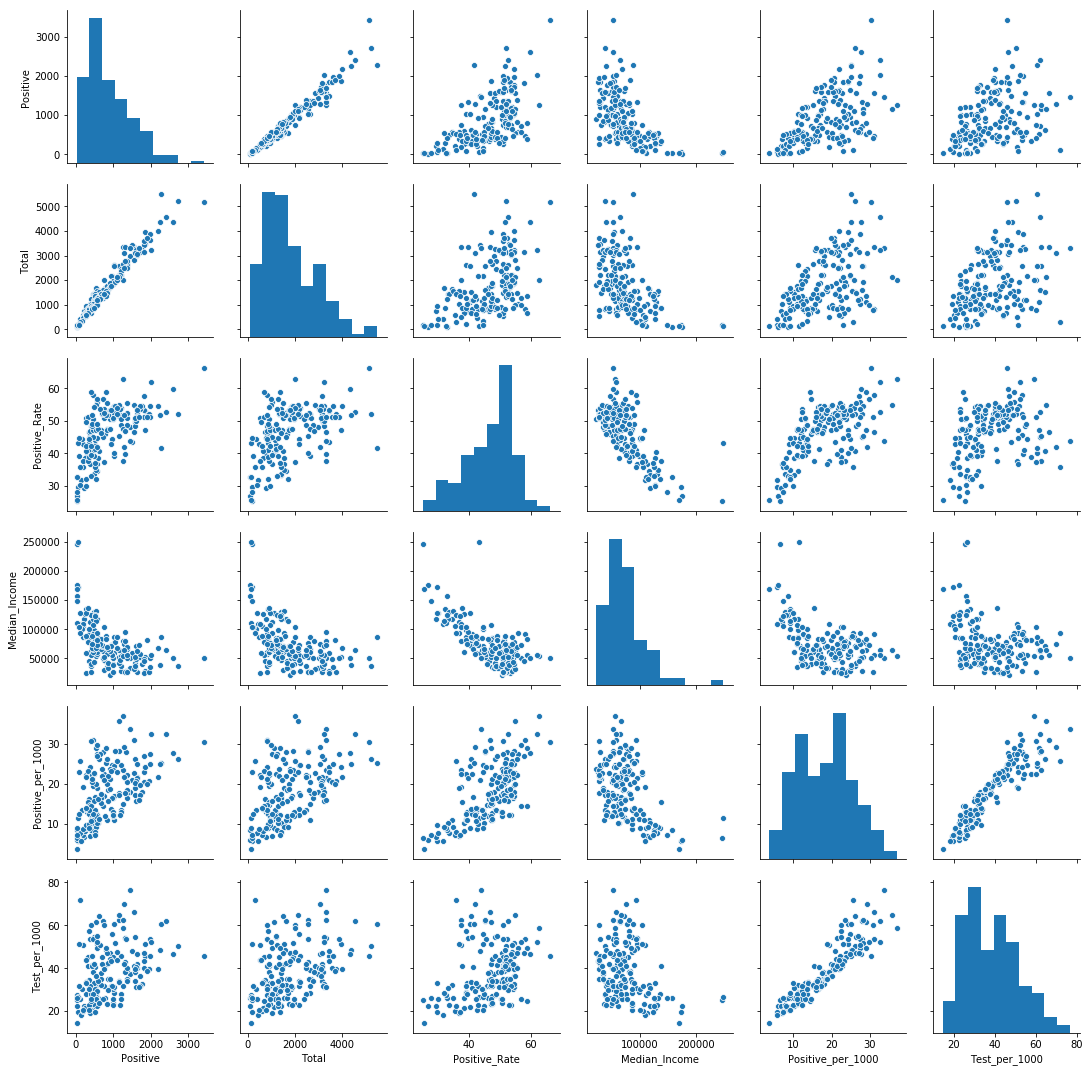

In [60]:
sns.pairplot(df_merge_population[['Positive','Total','Positive_Rate','Median_Income','Positive_per_1000', 'Test_per_1000']])
plt.show()

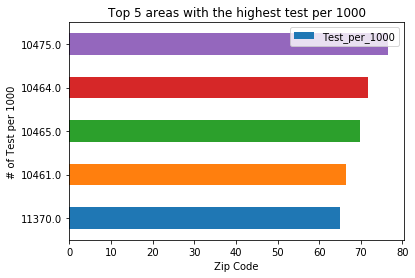

In [51]:
chart_top10_test = df_merge_population.sort_values(by=['Test_per_1000'])[-5:].plot(x="Zip_Code", y="Test_per_1000", kind="barh")
plt.title ("Top 5 areas with the highest test per 1000")
plt.ylabel ("# of Test per 1000")
plt.xlabel ("Zip Code")
plt.show()



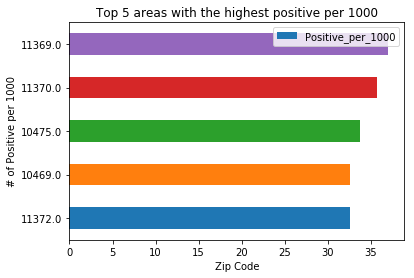

In [52]:
chart_top10_positive = df_merge_population.sort_values(by=['Positive_per_1000'])[-5:].plot(x="Zip_Code", y="Positive_per_1000", kind="barh")
plt.title ("Top 5 areas with the highest positive per 1000")
plt.ylabel ("# of Positive per 1000")
plt.xlabel ("Zip Code")
plt.show()

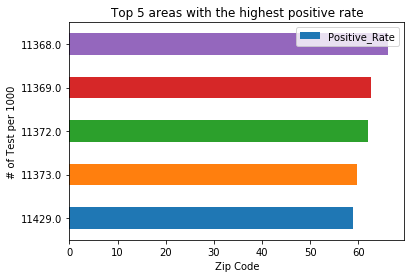

In [54]:
chart_top10_test = df_merge_population.sort_values(by=['Positive_Rate'])[-5:].plot(x="Zip_Code", y="Positive_Rate", kind="barh")
plt.title ("Top 5 areas with the highest positive rate")
plt.ylabel ("# of Test per 1000")
plt.xlabel ("Zip Code")
plt.show()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0.98, 'Correlation between Median Income and Confirmed Cases per 1k')

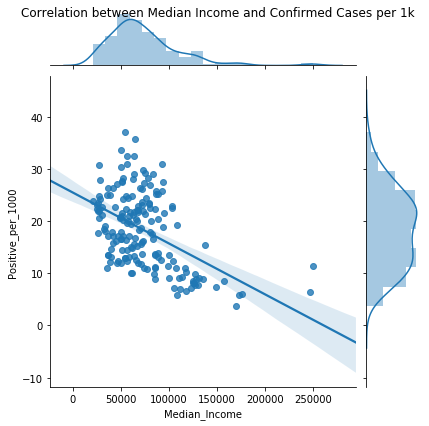

In [44]:
chart_positive_1000 = sns.jointplot(x='Median_Income', y='Positive_per_1000', data=df_merge_population, kind="reg")
chart_positive_1000.fig.suptitle('Correlation between Median Income and Confirmed Cases per 1k') 


Text(0.5, 0.98, 'Correlation between Median Income and Total Test per 1k')

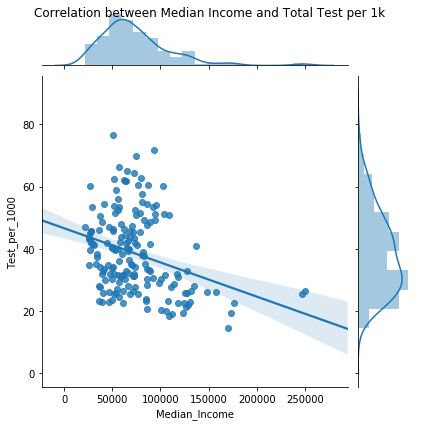

In [45]:
chart_test_1000 = sns.jointplot(x='Median_Income', y='Test_per_1000', data=df_merge_population, kind="reg")
chart_test_1000.fig.suptitle('Correlation between Median Income and Total Test per 1k') 


Text(0.5, 0.98, 'Correlation between Median Income and Total Test')

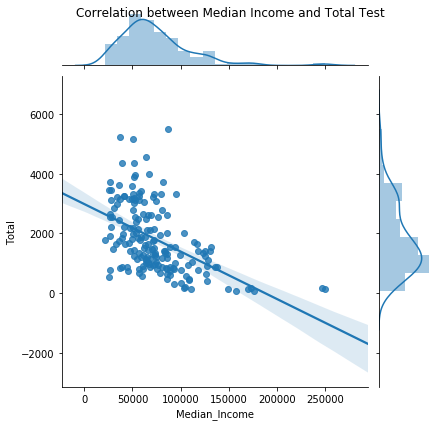

In [46]:
chart_total = sns.jointplot(x='Median_Income', y='Total', data=df_merge, kind="reg")
chart_total.fig.suptitle('Correlation between Median Income and Total Test') 

Text(0.5, 0.98, 'Correlation between Median Income and Confirmed Cases')

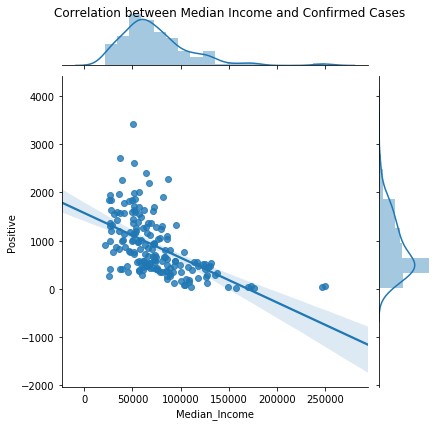

In [47]:
chart_Positive = sns.jointplot(x='Median_Income', y='Positive', data=df_merge, kind="reg")
chart_Positive.fig.suptitle('Correlation between Median Income and Confirmed Cases') 

Text(0.5, 0.98, 'Correlation between Median Income and Positive Rate')

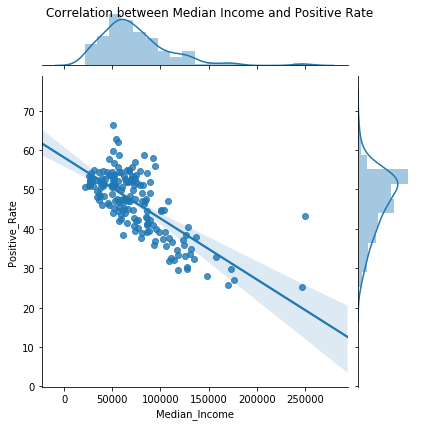

In [48]:
chart_Positive_Rate = sns.jointplot(x='Median_Income', y='Positive_Rate', data=df_merge, kind="reg")
chart_Positive_Rate.fig.suptitle('Correlation between Median Income and Positive Rate') 

In [ ]:
to_excel = df_merge_population.to_excel('clean.xlsx')

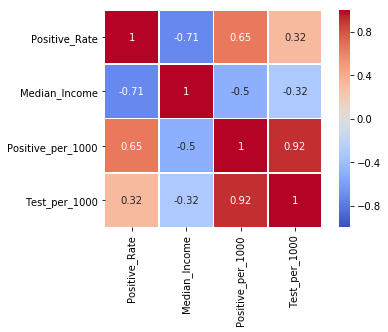

<Figure size 432x288 with 0 Axes>

In [61]:
df_merge_population_corr = df_merge_population.drop(['Zip_Code', 'Positive', 'Total', 'Population'], axis=1)
corrMatrix = df_merge_population_corr.corr()
sns.heatmap(corrMatrix, annot=True, linewidth = 0.5, cmap='coolwarm',square=True, vmin = -1, vmax = 1)
plt.show()
# plt.figure(figsize=(5,4))
plt.tight_layout()

In [62]:
fp = "acs2018_5yr_B19001_86000US10543.shp"
map_df = gpd.read_file(fp)
# check the GeoDataframe
map_df.head()

,geoid,name,B19001001,B19001001e,B19001002,B19001002e,B19001003,B19001003e,B19001004,B19001004e,...,B19001013e,B19001014,B19001014e,B19001015,B19001015e,B19001016,B19001016e,B19001017,B19001017e,geometry
0,01000US,United States,119730128.0,232429.0,7584305.0,18464.0,5507051.0,15243.0,5488289.0,17043.0,...,47276.0,10600942.0,51888.0,6932183.0,35577.0,7513313.0,42617.0,8355566.0,47620.0,"(POLYGON ((-168.225273 -14.535906, -168.199527..."
1,04000US36,New York,7316537.0,13711.0,492408.0,5214.0,378399.0,3977.0,325767.0,4093.0,...,7268.0,658357.0,5530.0,466265.0,5399.0,554471.0,5334.0,712800.0,7070.0,"(POLYGON ((-79.312136 42.686805, -79.249765999..."
2,86000US06390,06390,73.0,45.0,0.0,12.0,2.0,3.0,0.0,12.0,...,12.0,6.0,6.0,0.0,12.0,21.0,30.0,7.0,7.0,"(POLYGON ((-72.00941899999999 41.285283, -72.0..."
3,86000US07421,07421,2637.0,164.0,50.0,53.0,35.0,32.0,32.0,37.0,...,112.0,315.0,112.0,263.0,103.0,391.0,121.0,226.0,87.0,"(POLYGON ((-74.331046 41.186667, -74.331017 41..."
4,86000US10001,10001,12431.0,521.0,1096.0,324.0,488.0,168.0,494.0,175.0,...,235.0,1063.0,266.0,873.0,210.0,945.0,197.0,2797.0,350.0,"POLYGON ((-74.00828 40.750272, -74.007829 40.7..."


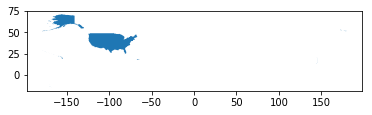

In [63]:
map_df.plot()

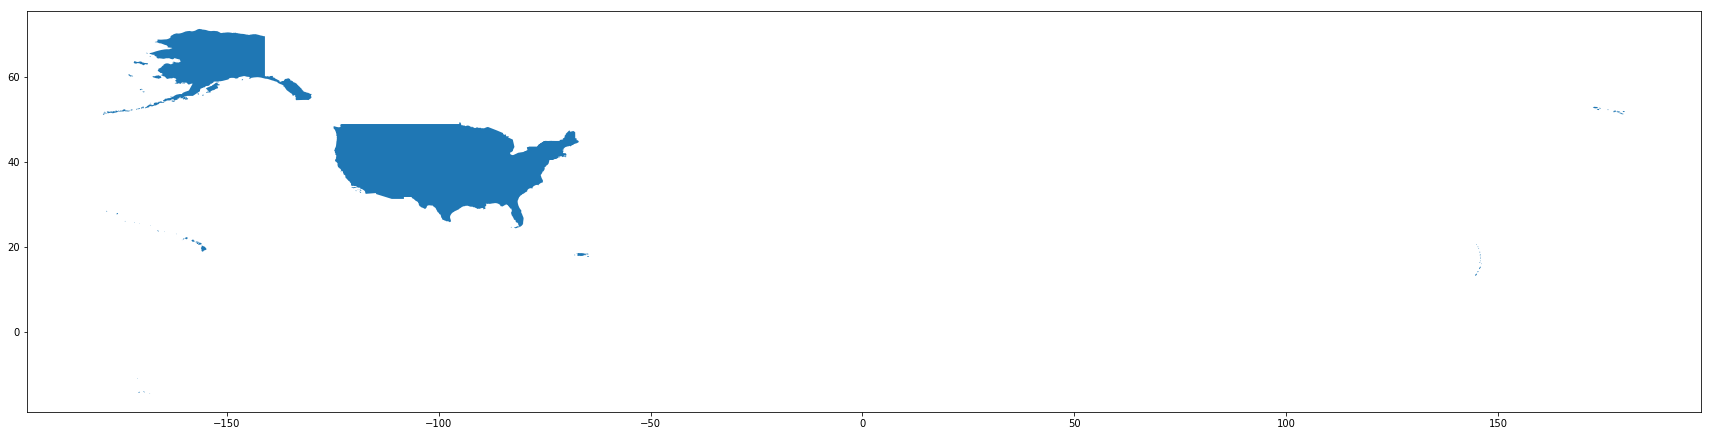

In [64]:
plt.rcParams['figure.figsize'] = [30, 90] #height, width
map_df.plot()

In [65]:
# join the geodataframe with the csv dataframe
merged = map_df.merge(df_merge_population, how='left', on="geoid")

merged.head()

,geoid,name,B19001001,B19001001e,B19001002,B19001002e,B19001003,B19001003e,B19001004,B19001004e,...,B19001017e,geometry,Zip_Code,Positive,Total,Positive_Rate,Median_Income,Population,Positive_per_1000,Test_per_1000
0,01000US,United States,119730128.0,232429.0,7584305.0,18464.0,5507051.0,15243.0,5488289.0,17043.0,...,47620.0,"(POLYGON ((-168.225273 -14.535906, -168.199527...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04000US36,New York,7316537.0,13711.0,492408.0,5214.0,378399.0,3977.0,325767.0,4093.0,...,7070.0,"(POLYGON ((-79.312136 42.686805, -79.249765999...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,86000US06390,06390,73.0,45.0,0.0,12.0,2.0,3.0,0.0,12.0,...,7.0,"(POLYGON ((-72.00941899999999 41.285283, -72.0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,86000US07421,07421,2637.0,164.0,50.0,53.0,35.0,32.0,32.0,37.0,...,87.0,"(POLYGON ((-74.331046 41.186667, -74.331017 41...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,86000US10001,10001,12431.0,521.0,1096.0,324.0,488.0,168.0,494.0,175.0,...,350.0,"POLYGON ((-74.00828 40.750272, -74.007829 40.7...",10001.0,300.0,759.0,39.53,88526.0,22924.0,13.086721,33.109405


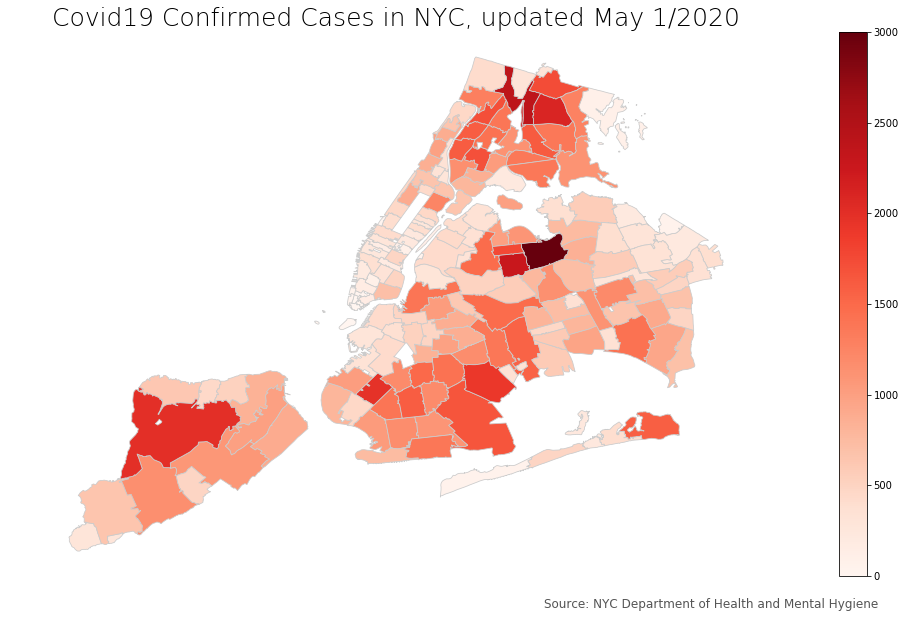

In [66]:
# set the value column that will be visualised
variable = 'Positive'
# set the range for the choropleth values
vmin, vmax = 0, 3000
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
# remove the axis
ax.axis('off')
# add a title and annotation
ax.set_title('Covid19 Confirmed Cases in NYC, updated May 1/2020', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source: NYC Department of Health and Mental Hygiene', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')
# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
# add the colorbar to the figure
fig.colorbar(sm)
# create map
merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')

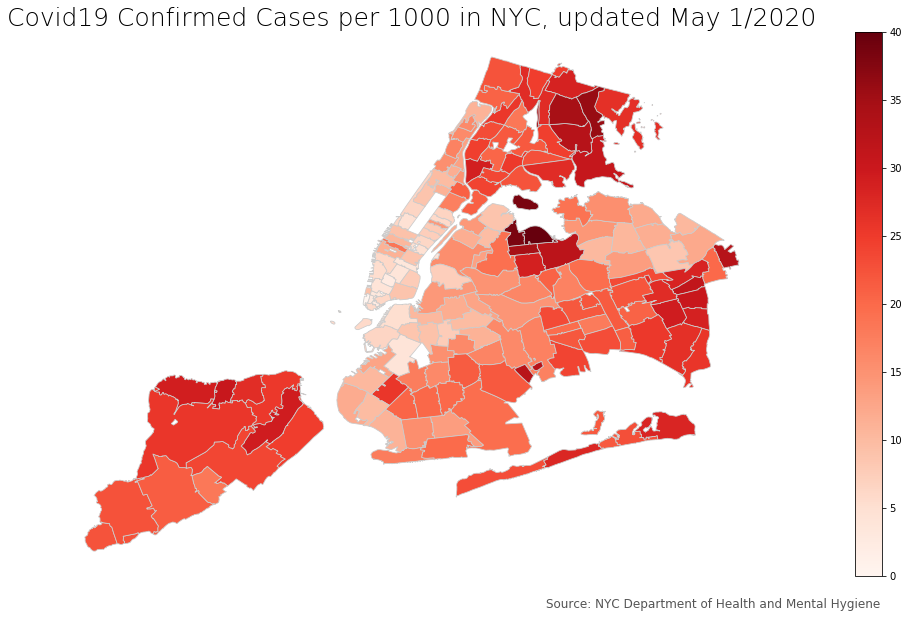

In [70]:
# set the value column that will be visualised
variable = 'Positive_per_1000'
# set the range for the choropleth values
vmin, vmax = 0, 40
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
# remove the axis
ax.axis('off')
# add a title and annotation
ax.set_title('Covid19 Confirmed Cases per 1000 in NYC, updated May 1/2020', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source: NYC Department of Health and Mental Hygiene', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')
# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
# add the colorbar to the figure
fig.colorbar(sm)
# create map
merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')

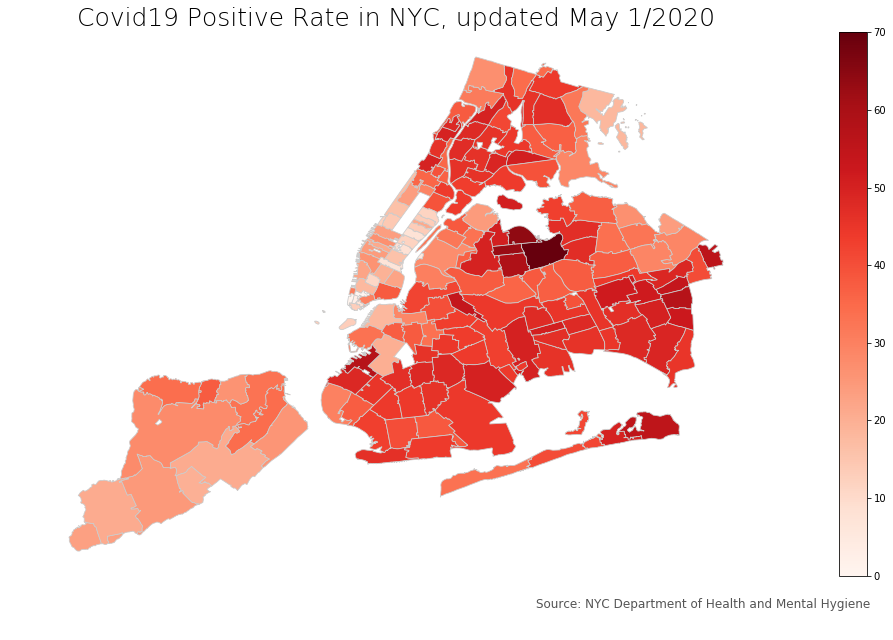

In [72]:
# set the value column that will be visualised
variable = 'Positive_Rate'
# set the range for the choropleth values
vmin, vmax = 0, 70
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
# remove the axis
ax.axis('off')
# add a title and annotation
ax.set_title('Covid19 Positive Rate in NYC, updated May 1/2020', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source: NYC Department of Health and Mental Hygiene', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')
# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
# add the colorbar to the figure
fig.colorbar(sm)
# create map
merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')

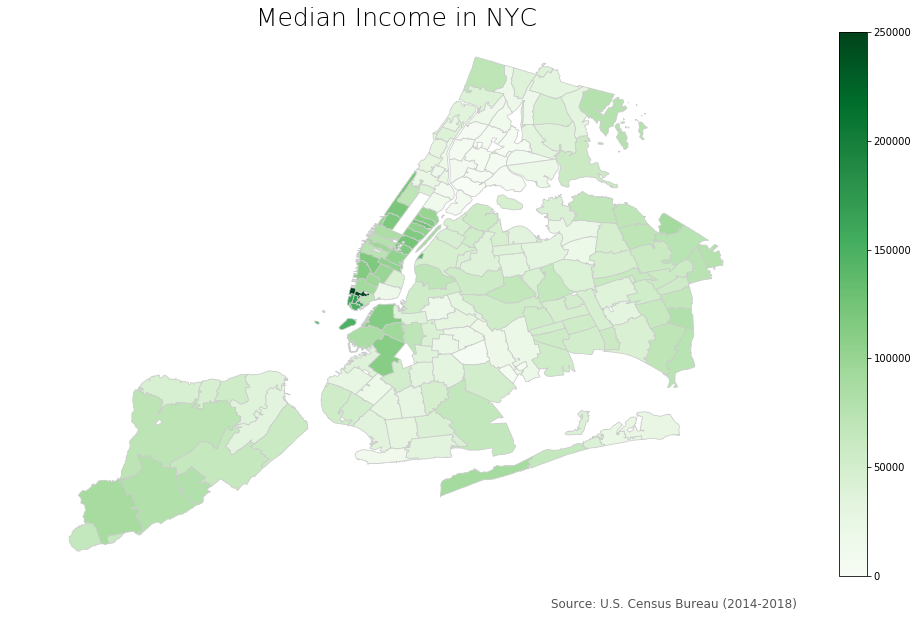

In [67]:
# set the value column that will be visualised
variable = 'Median_Income'
# set the range for the choropleth values
vmin, vmax = 0, 250000
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
# remove the axis
ax.axis('off')
# add a title and annotation
ax.set_title('Median Income in NYC', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source: U.S. Census Bureau (2014-2018)', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')
# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
# add the colorbar to the figure
fig.colorbar(sm)
# create map
merged.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8')